In [2]:
import numpy as np
import pandas as pd

### Timestamp Object

Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

### Creating Timestamp objects

In [5]:
# creating a timestamp
type(pd.Timestamp('2025/5/13'))

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
# variations
pd.Timestamp('2025-5-13')
pd.Timestamp('2025, 5, 13')

Timestamp('2025-05-13 00:00:00')

In [7]:
# only year
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [8]:
# using text
pd.Timestamp('13th May 2025')

Timestamp('2025-05-13 00:00:00')

In [9]:
# providing time also
pd.Timestamp('13th May 2025 6:57PM')

Timestamp('2025-05-13 18:57:00')

In [10]:
import datetime as dt

x = pd.Timestamp(dt.datetime(2025,5,13,18,57,56))
x

Timestamp('2025-05-13 18:57:56')

In [11]:
#fetch attribute
x.day

13

In [12]:
x.year

2025

In [13]:
x.month

5

In [14]:
x.hour

18

In [15]:
x.minute

57

In [16]:
x.second

56

# why separate objects to handle data and time when python already has datetime functionality?
- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [18]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [19]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

# DatetimeIndex Object

A collection of pandas timestamp

In [22]:
# from string
pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1'])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [23]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [24]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])

In [25]:
# using datatimeindex as series index

pd.Series([1,2,3],index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

In [26]:
# generate daily dates in a given range, in gap of 3 days
pd.date_range(start='2023/1/5',end='2023/2/28',freq='3D')

DatetimeIndex(['2023-01-05', '2023-01-08', '2023-01-11', '2023-01-14',
               '2023-01-17', '2023-01-20', '2023-01-23', '2023-01-26',
               '2023-01-29', '2023-02-01', '2023-02-04', '2023-02-07',
               '2023-02-10', '2023-02-13', '2023-02-16', '2023-02-19',
               '2023-02-22', '2023-02-25', '2023-02-28'],
              dtype='datetime64[ns]', freq='3D')

In [27]:
# this generate buisness days does not have saturday or sunday
pd.date_range(start='2023/1/1',end='2025/12/31',freq='B')

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2025-12-18', '2025-12-19', '2025-12-22', '2025-12-23',
               '2025-12-24', '2025-12-25', '2025-12-26', '2025-12-29',
               '2025-12-30', '2025-12-31'],
              dtype='datetime64[ns]', length=783, freq='B')

In [28]:
# W -> one week per day
pd.date_range(start='2023/1/5',end='2023/2/28',freq='W-THU')

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26',
               '2023-02-02', '2023-02-09', '2023-02-16', '2023-02-23'],
              dtype='datetime64[ns]', freq='W-THU')

In [29]:
# H -> Hourly data(factor)
pd.date_range(start='2023/1/5',end='2023/2/28',freq='6H')

DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 06:00:00',
               '2023-01-05 12:00:00', '2023-01-05 18:00:00',
               '2023-01-06 00:00:00', '2023-01-06 06:00:00',
               '2023-01-06 12:00:00', '2023-01-06 18:00:00',
               '2023-01-07 00:00:00', '2023-01-07 06:00:00',
               ...
               '2023-02-25 18:00:00', '2023-02-26 00:00:00',
               '2023-02-26 06:00:00', '2023-02-26 12:00:00',
               '2023-02-26 18:00:00', '2023-02-27 00:00:00',
               '2023-02-27 06:00:00', '2023-02-27 12:00:00',
               '2023-02-27 18:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=217, freq='6H')

In [30]:
# M -> Month end
pd.date_range(start='2023/1/5',end='2023/2/28',freq='M')

DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='M')

In [31]:
# MS -> Month start
pd.date_range(start='2023/1/5',end='2023/2/28',freq='MS')

DatetimeIndex(['2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [32]:
# using periods(number of results)
pd.date_range(start='2023/1/5',periods=25,freq='D')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='D')

In [33]:
# using periods(number of results)
pd.date_range(start='2023/1/5',periods=25,freq='M')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31'],
              dtype='datetime64[ns]', freq='M')

### to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object

In [35]:
# simple series example

s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [36]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s).dt.month_name()

ParserError: Unknown string format: 2021/130/1

In [37]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce').dt.month_name()

0    January
1    January
2        NaN
dtype: object

In [39]:
df = pd.read_csv('expense_data.csv')
df.shape

(277, 11)

In [41]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [42]:
df['Date'] = pd.to_datetime(df['Date'])

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [44]:
df['Date'].dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
272    2021
273    2021
274    2021
275    2021
276    2021
Name: Date, Length: 277, dtype: int64

In [45]:
df['Date'].dt.is_month_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [46]:
df['Date'].dt.is_quarter_start

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

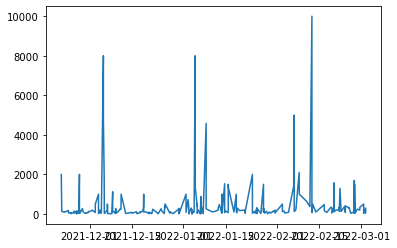

In [47]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [48]:
# day name wise bar chart/month wise bar chart

df['day_name'] = df['Date'].dt.day_name()

<AxesSubplot:xlabel='day_name'>

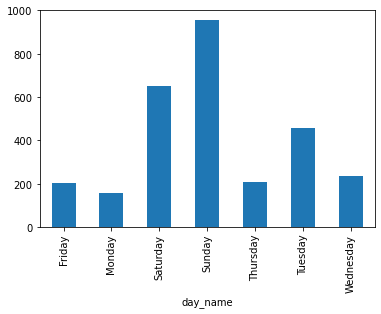

In [49]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')

In [50]:
#is month end
df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday


# Timedelta Object

Represents a duration, the difference between two dates or times.

In [63]:
# create using Timestamp objects
t1 = pd.Timestamp('6th Jan 2023 8:20:14')
t2 = pd.Timestamp('26th Jan 2023 10:00:00')

t2 - t1

Timedelta('20 days 01:39:46')

In [65]:
# standalone creation
pd.Timedelta(days=2,hours=10,minutes=35)

Timedelta('2 days 10:35:00')

In [67]:
# Arithmetic
pd.Timestamp('13th may 2025') + pd.Timedelta(days=2,hours=10,minutes=35)

Timestamp('2025-05-15 10:35:00')

In [69]:
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D') - pd.Timedelta(days=2,hours=10,minutes=35)

DatetimeIndex(['2023-01-03 13:25:00', '2023-01-04 13:25:00',
               '2023-01-05 13:25:00', '2023-01-06 13:25:00',
               '2023-01-07 13:25:00', '2023-01-08 13:25:00',
               '2023-01-09 13:25:00', '2023-01-10 13:25:00',
               '2023-01-11 13:25:00', '2023-01-12 13:25:00',
               '2023-01-13 13:25:00', '2023-01-14 13:25:00',
               '2023-01-15 13:25:00', '2023-01-16 13:25:00',
               '2023-01-17 13:25:00', '2023-01-18 13:25:00',
               '2023-01-19 13:25:00', '2023-01-20 13:25:00',
               '2023-01-21 13:25:00', '2023-01-22 13:25:00',
               '2023-01-23 13:25:00', '2023-01-24 13:25:00',
               '2023-01-25 13:25:00', '2023-01-26 13:25:00',
               '2023-01-27 13:25:00', '2023-01-28 13:25:00'],
              dtype='datetime64[ns]', freq='D')

# Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [83]:
google=pd.read_csv('google-stocks.csv',parse_dates=['Date'])

In [85]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [87]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4431 non-null   datetime64[ns]
 1   Open       4431 non-null   float64       
 2   High       4431 non-null   float64       
 3   Low        4431 non-null   float64       
 4   Close      4431 non-null   float64       
 5   Adj Close  4431 non-null   float64       
 6   Volume     4431 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 242.4 KB


In [89]:
google.set_index('Date',inplace=True)

In [91]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [97]:
#fetch specific date data
google.loc['2004-08-19']

Open         5.005005e+01
High         5.208208e+01
Low          4.802803e+01
Close        5.022022e+01
Adj Close    5.022022e+01
Volume       4.465910e+07
Name: 2004-08-19 00:00:00, dtype: float64

In [101]:
#partial indexing -> select particular year/month
google.loc['2004-09']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-01,51.401402,51.536537,49.884884,50.175175,50.175175,9138253
2004-09-02,49.644646,51.236237,49.519520,50.805805,50.805805,15118666
2004-09-03,50.525524,50.920921,49.709709,50.055054,50.055054,5152442
2004-09-07,50.555557,51.051052,49.854855,50.840839,50.840839,5847547
2004-09-08,50.420422,51.566566,50.300301,51.201202,51.201202,4985609
2004-09-09,51.316315,51.406406,50.550552,51.206207,51.206207,4061734
2004-09-10,50.850849,53.333332,50.700703,52.717716,52.717716,8698892
2004-09-13,53.368366,54.259258,53.283283,53.803802,53.803802,7844148
2004-09-14,53.778778,56.056057,53.448448,55.800800,55.800800,10828960


In [103]:
google.loc['2004']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...
2004-12-27,94.669670,96.746750,94.644646,96.051048,96.051048,12195992
2004-12-28,96.151154,96.871872,95.600601,96.476479,96.476479,8283308
2004-12-29,95.985985,96.856857,95.985985,96.546547,96.546547,5350844


In [115]:
#create year month-name and day-name
google['month_name']=google.index.month_name()
google['weekday_name']=google.index.day_name()
google['quarter']=google.index.quarter

In [123]:
google

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100,March,Friday,1
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600,March,Monday,1
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800,March,Tuesday,1


In [127]:
# silicing
google.loc['2004-08-01':'2005-01-01']

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2004-12-27,94.669670,96.746750,94.644646,96.051048,96.051048,12195992,December,Monday,4
2004-12-28,96.151154,96.871872,95.600601,96.476479,96.476479,8283308,December,Tuesday,4
2004-12-29,95.985985,96.856857,95.985985,96.546547,96.546547,5350844,December,Wednesday,4


In [145]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta
#this will not encounter the leap year

pd.date_range(start='2004-08-06',end='2022-08-10',freq='365D')

DatetimeIndex(['2004-08-06', '2005-08-06', '2006-08-06', '2007-08-06',
               '2008-08-05', '2009-08-05', '2010-08-05', '2011-08-05',
               '2012-08-04', '2013-08-04', '2014-08-04', '2015-08-04',
               '2016-08-03', '2017-08-03', '2018-08-03', '2019-08-03',
               '2020-08-02', '2021-08-02', '2022-08-02'],
              dtype='datetime64[ns]', freq='365D')

In [147]:
#this will not encounter the leap year
#also timedelta does not take value in year
pd.date_range(start='2004-08-06',end='2022-08-10',freq=pd.Timedelta(days=365))

DatetimeIndex(['2004-08-06', '2005-08-06', '2006-08-06', '2007-08-06',
               '2008-08-05', '2009-08-05', '2010-08-05', '2011-08-05',
               '2012-08-04', '2013-08-04', '2014-08-04', '2015-08-04',
               '2016-08-03', '2017-08-03', '2018-08-03', '2019-08-03',
               '2020-08-02', '2021-08-02', '2022-08-02'],
              dtype='datetime64[ns]', freq='365D')

In [157]:
#dateoffset consider leap year and also take year inerval
pd.date_range(start='2004-08-06',end='2022-08-10',freq=pd.DateOffset(years=1))

DatetimeIndex(['2004-08-06', '2005-08-06', '2006-08-06', '2007-08-06',
               '2008-08-06', '2009-08-06', '2010-08-06', '2011-08-06',
               '2012-08-06', '2013-08-06', '2014-08-06', '2015-08-06',
               '2016-08-06', '2017-08-06', '2018-08-06', '2019-08-06',
               '2020-08-06', '2021-08-06', '2022-08-06'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [161]:
date_index=pd.date_range(start='2004-08-06',end='2022-08-10',freq=pd.DateOffset(years=1))
google[google.index.isin(date_index)]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2007-08-06,251.751755,255.330338,251.501495,255.255249,255.255249,7295697,August,Monday,3
2008-08-06,239.424423,245.130127,236.491486,243.413406,243.413406,6744848,August,Wednesday,3
2009-08-06,227.377380,227.667664,224.489487,225.405411,225.405411,4217578,August,Thursday,3
2010-08-06,252.952957,253.123123,248.273270,250.360367,250.360367,6632361,August,Friday,3
2012-08-06,320.125122,325.015015,319.929932,321.731720,321.731720,3561235,August,Monday,3
2013-08-06,452.797791,455.310303,448.313324,448.733734,448.733734,3009188,August,Tuesday,3
2014-08-06,569.500000,578.640015,567.450012,574.489990,574.489990,1322800,August,Wednesday,3
2015-08-06,673.989990,674.750000,660.729980,670.150024,670.150024,2033000,August,Thursday,3
2018-08-06,1241.609985,1242.459961,1230.530029,1237.670044,1237.670044,1105700,August,Monday,3


<AxesSubplot:xlabel='Date'>

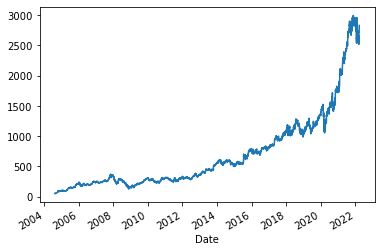

In [163]:
google['Close'].plot()

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

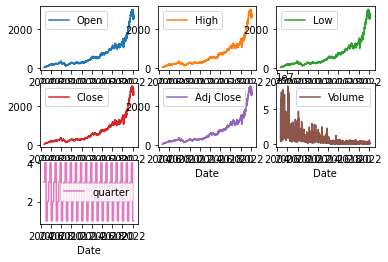

In [179]:
google.plot(subplots=True,layout=(3,3),sharex=False,sharey=False)

<AxesSubplot:xlabel='Date'>

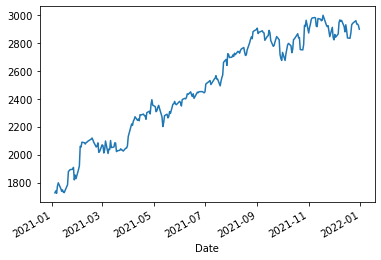

In [181]:
#Plot graph for a particular month/year
google.loc['2021']['Close'].plot()

<AxesSubplot:xlabel='Date'>

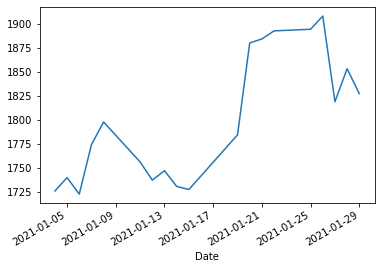

In [207]:
#monthly data
google.loc['2021-1']['Close'].plot()

In [189]:
#frequency, currenlty freq is none
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=4431, freq=None)

In [191]:
#this added all the dates including Sat/Sun so it added NaN values as we have only business days
google.asfreq('D')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0,August,Friday,3.0
2004-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0,August,Monday,3.0
...,...,...,...,...,...,...,...,...,...
2022-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600.0,March,Monday,1.0
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800.0,March,Tuesday,1.0


In [193]:
google.asfreq('B')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0,August,Friday,3.0
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0,August,Monday,3.0
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337.0,August,Tuesday,3.0
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602.0,August,Wednesday,3.0
...,...,...,...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100.0,March,Friday,1.0
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600.0,March,Monday,1.0
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800.0,March,Tuesday,1.0


In [195]:
#here we get the quarterly data
google.asfreq('Q')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-09-30,65.015015,66.216217,64.564568,64.864868,64.864868,13758028.0,September,Thursday,3.0
2004-12-31,99.714714,100.040039,96.376373,96.491493,96.491493,15321663.0,December,Friday,4.0
2005-03-31,89.064064,90.785789,88.908913,90.345345,90.345345,13523663.0,March,Thursday,1.0
2005-06-30,147.317322,149.614609,145.665665,147.222229,147.222229,30158611.0,June,Thursday,2.0
2005-09-30,157.267273,158.908905,156.301300,158.388382,158.388382,18284297.0,September,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2020-12-31,1737.270020,1757.500000,1736.089966,1752.640015,1752.640015,1053500.0,December,Thursday,4.0
2021-03-31,2054.399902,2086.260010,2047.000000,2062.520020,2062.520020,2128500.0,March,Wednesday,1.0
2021-06-30,2439.889893,2445.139893,2427.090088,2441.790039,2441.790039,1223700.0,June,Wednesday,2.0


In [197]:
#here we get the hourly data
google.asfreq('H')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-19 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-03-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-23 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
#to fill NaN values we have method
google.asfreq('6H',method='ffill')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-19 06:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-19 12:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-19 18:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20 00:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
...,...,...,...,...,...,...,...,...,...
2022-03-23 00:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700,March,Wednesday,1
2022-03-23 06:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700,March,Wednesday,1
2022-03-23 12:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700,March,Wednesday,1


In [201]:
google.asfreq('6H',method='bfill')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-19 06:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-19 12:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-19 18:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-20 00:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
...,...,...,...,...,...,...,...,...,...
2022-03-23 00:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700,March,Wednesday,1
2022-03-23 06:00:00,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900,March,Thursday,1
2022-03-23 12:00:00,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900,March,Thursday,1


<AxesSubplot:xlabel='Date'>

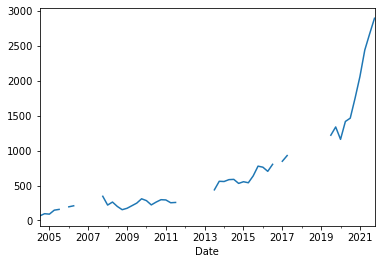

In [205]:
google['Close'].asfreq('Q').plot()

<AxesSubplot:xlabel='month_name'>

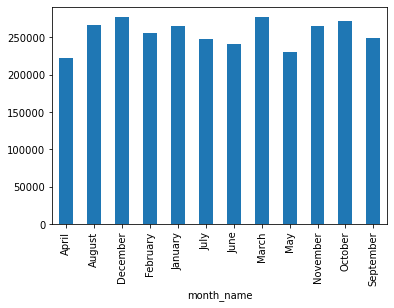

In [209]:
#montly trend
google.groupby('month_name')['Close'].sum().plot(kind='bar')

<AxesSubplot:xlabel='weekday_name'>

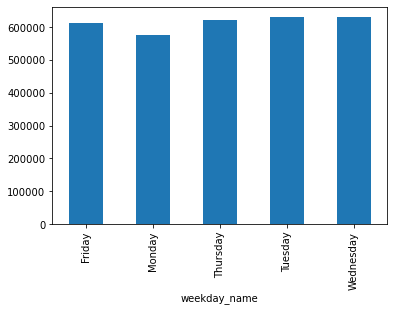

In [215]:
#weekday trends
google.groupby('weekday_name')['Close'].sum().plot(kind='bar')

<AxesSubplot:xlabel='quarter'>

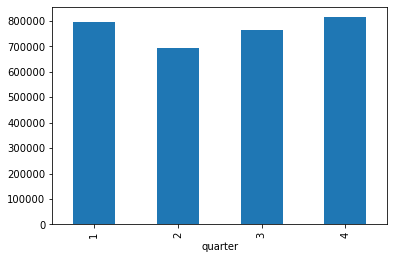

In [217]:
#quartely trend
google.groupby('quarter')['Close'].sum().plot(kind='bar')

# Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

Sure! Let's break down **upscaling** and **downscaling** using a simple time series dataset in **Pandas**.

---

## ⏱️ What Are Upscaling and Downscaling?

| Term                           | Meaning                                                       |
| ------------------------------ | ------------------------------------------------------------- |
| **Downsampling** (Downscaling) | Reducing the frequency of data (e.g., from daily to monthly)  |
| **Upsampling** (Upscaling)     | Increasing the frequency of data (e.g., from daily to hourly) |

---

## 🔢 Sample Data

```python
import pandas as pd

# Create sample daily time series data
date_rng = pd.date_range(start='2024-01-01', end='2024-01-10', freq='D')
df = pd.DataFrame({'value': range(1, 11)}, index=date_rng)

print(df)
```

### Output:

```
            value
2024-01-01      1
2024-01-02      2
2024-01-03      3
2024-01-04      4
2024-01-05      5
2024-01-06      6
2024-01-07      7
2024-01-08      8
2024-01-09      9
2024-01-10     10
```

---

## 📉 Downsampling Example (Daily ➝ Every 3 Days)

```python
# Downsample to every 3 days and take the mean
downsampled = df.resample('3D').mean()
print(downsampled)
```

### Output:

```
            value
2024-01-01    2.0  # (1+2+3)/3
2024-01-04    5.0  # (4+5+6)/3
2024-01-07    8.0  # (7+8+9)/3
2024-01-10   10.0  # only one value
```

---

## 📈 Upsampling Example (Daily ➝ Hourly)

```python
# Upsample to hourly data — fill missing values using forward-fill
upsampled = df.resample('H').ffill()
print(upsampled.head(10))
```

### Output:

```
            value
2024-01-01 00:00:00      1
2024-01-01 01:00:00      1
2024-01-01 02:00:00      1
...
2024-01-02 00:00:00      2
```

You can also fill missing values differently:

* `ffill()` — forward fill
* `bfill()` — backward fill
* `interpolate()` — estimate values between known points

---

## 🧠 Summary

| Operation        | Frequency Change                    | Common Use Case                        |
| ---------------- | ----------------------------------- | -------------------------------------- |
| **Downsampling** | High → Low (e.g., daily to monthly) | Aggregating data (mean, sum, etc.)     |
| **Upsampling**   | Low → High (e.g., daily to hourly)  | Filling in gaps, finer time resolution |



Great question! In **Pandas**, both `.asfreq()` and `.resample()` are used to change the frequency of time series data — but they behave **very differently** in terms of what they **do with the data**.

Let’s break it down clearly with examples 👇

---

## 🆚 `.asfreq()` vs `.resample()` — Key Differences

| Feature            | `.asfreq()`                              | `.resample()`                                    |
| ------------------ | ---------------------------------------- | ------------------------------------------------ |
| **Purpose**        | Change frequency **without aggregation** | Change frequency **with aggregation or filling** |
| **Aggregation**    | ❌ No aggregation                         | ✅ Supports aggregation (`mean()`, `sum()`, etc.) |
| **Missing values** | Can insert NaNs                          | Can fill or aggregate missing values             |
| **Speed**          | Faster                                   | Slower but more flexible                         |
| **Use case**       | Just reindexing                          | Restructuring and computing summaries            |

---

## 📊 Sample Data

```python
import pandas as pd

# Create a simple time series
date_rng = pd.date_range(start='2024-01-01', periods=5, freq='D')
df = pd.DataFrame({'value': [10, 20, 30, 40, 50]}, index=date_rng)
print(df)
```

### Output:

```
            value
2024-01-01     10
2024-01-02     20
2024-01-03     30
2024-01-04     40
2024-01-05     50
```

---

## ⚙️ 1. Using `.asfreq('2D')` — change frequency, no aggregation

```python
df_asfreq = df.asfreq('2D')
print(df_asfreq)
```

### Output:

```
            value
2024-01-01     10
2024-01-03     30
2024-01-05     50
```

* Keeps only rows that **exist** at the new frequency (2-day interval).
* No aggregation — just a subset.

---

## ⚙️ 2. Using `.resample('2D').mean()` — change frequency **with aggregation**

```python
df_resample = df.resample('2D').mean()
print(df_resample)
```

### Output:

```
            value
2024-01-01   15.0   # average of 10 + 20
2024-01-03   35.0   # average of 30 + 40
2024-01-05   50.0   # just 50
```

* Resamples in 2-day chunks and **computes the mean** of the values within each chunk.

---

## ✅ When to Use What?

| Goal                                              | Use                                        |
| ------------------------------------------------- | ------------------------------------------ |
| Just align time index to a new frequency          | `.asfreq()`                                |
| Aggregate or compute summaries over new frequency | `.resample()`                              |
| Fill in missing periods without modifying values  | `.asfreq().ffill()` or `.asfreq().bfill()` |
| Compute rolling stats per week/month/etc          | `.resample()` + `.mean()` / `.sum()`       |

---

## Bonus: Forward fill with `.asfreq()`

```python
df_asfreq_fill = df.asfreq('12H').ffill()
print(df_asfreq_fill.head(5))
```

* Inserts 12-hour intervals and forward-fills missing values.



In [220]:
# Downsampling
#yt['Subscribers'].plot()
#yt['Subscribers'].resample('Y').mean().plot()

<AxesSubplot:xlabel='Date'>

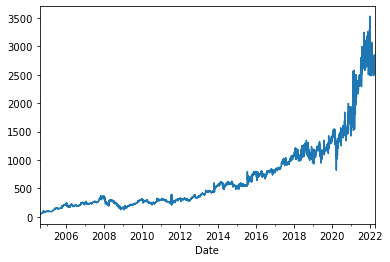

In [226]:
# Upsampling
#here since we increase the frequency will get NaN values which needs to be filled by a method, method will depend on type of data we have which
# is part of time series analysis, spline is use for polynomial, we have liner also
google['Close'].resample('12H').interpolate(method='spline',order=2).plot()

# Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data. 

Absolutely! Let's dive into **rolling operations in pandas** — a powerful tool for **moving window calculations** on time series or sequential data.

---

## 🔁 What is `rolling()` in pandas?

`rolling()` creates a **moving window view** over a DataFrame or Series. This is useful for computing statistics like **moving averages, rolling sums, standard deviations**, etc.

---

## 📊 Example Dataset

```python
import pandas as pd

# Create a simple time series
date_rng = pd.date_range(start='2024-01-01', periods=10, freq='D')
df = pd.DataFrame({'value': range(1, 11)}, index=date_rng)

print(df)
```

### Output:

```
            value
2024-01-01      1
2024-01-02      2
2024-01-03      3
2024-01-04      4
2024-01-05      5
2024-01-06      6
2024-01-07      7
2024-01-08      8
2024-01-09      9
2024-01-10     10
```

---

## 📐 Rolling Mean Example (Window of 3 Days)

```python
# Calculate rolling mean with window size 3
df['rolling_mean'] = df['value'].rolling(window=3).mean()
print(df)
```

### Output:

```
            value  rolling_mean
2024-01-01      1           NaN
2024-01-02      2           NaN
2024-01-03      3           2.0   # (1+2+3)/3
2024-01-04      4           3.0   # (2+3+4)/3
2024-01-05      5           4.0   # (3+4+5)/3
...
2024-01-10     10           9.0
```

---

## ⚙️ Rolling Window Options

| Parameter       | Description                                                 |
| --------------- | ----------------------------------------------------------- |
| `window=N`      | Window size (number of periods)                             |
| `min_periods=1` | Minimum values required for computation                     |
| `center=True`   | Align result to center of window (default is right-aligned) |

---

## 🧮 Other Rolling Calculations

```python
# Rolling sum
df['rolling_sum'] = df['value'].rolling(window=3).sum()

# Rolling standard deviation
df['rolling_std'] = df['value'].rolling(window=3).std()

# Rolling max
df['rolling_max'] = df['value'].rolling(window=3).max()
```

---

## 📈 Visualization (Optional)

```python
import matplotlib.pyplot as plt

df[['value', 'rolling_mean']].plot(title="Rolling Mean (3-day)")
plt.show()
```

---

## ✅ Use Cases

* **Smoothing time series** (e.g., stock prices, temperature)
* **Trend detection**
* **Anomaly detection** using rolling std/variance
* **Financial indicators** (e.g., moving averages, Bollinger Bands)


<AxesSubplot:title={'center':'rolling'}, xlabel='Date'>

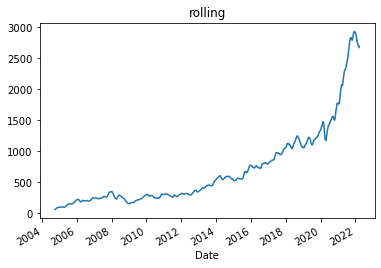

In [234]:
google['Close'].rolling(30).mean().plot(title='rolling')


<AxesSubplot:title={'center':'ewm'}, xlabel='Date'>

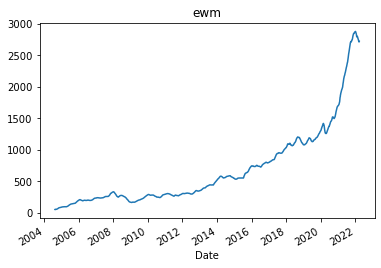

In [232]:
google['Close'].ewm(30).mean().plot(title='ewm')

Absolutely! Let's walk through a **clear, code-based example** comparing `.rolling()` and `.ewm()` side-by-side with **actual data**.

---

## 📊 Step-by-Step Example

```python
import pandas as pd
import matplotlib.pyplot as plt

# Create simple time series data
date_rng = pd.date_range(start='2024-01-01', periods=10, freq='D')
data = [10, 12, 13, 15, 14, 16, 18, 17, 20, 22]
df = pd.DataFrame({'value': data}, index=date_rng)

# Rolling Mean: 3-day simple moving average
df['rolling_mean'] = df['value'].rolling(window=3).mean()

# Exponential Weighted Moving Average (EWMA): span=3
df['ewm_mean'] = df['value'].ewm(span=3, adjust=False).mean()

# Display the data
print(df)
```

### 📋 Output:

| Date       | value | rolling\_mean | ewm\_mean |
| ---------- | ----- | ------------- | --------- |
| 2024-01-01 | 10    | NaN           | 10.00     |
| 2024-01-02 | 12    | NaN           | 10.67     |
| 2024-01-03 | 13    | 11.67         | 11.56     |
| 2024-01-04 | 15    | 13.33         | 12.71     |
| 2024-01-05 | 14    | 14.00         | 13.47     |
| 2024-01-06 | 16    | 15.00         | 14.65     |
| 2024-01-07 | 18    | 16.00         | 15.77     |
| 2024-01-08 | 17    | 17.00         | 16.25     |
| 2024-01-09 | 20    | 18.33         | 17.50     |
| 2024-01-10 | 22    | 19.67         | 18.83     |

---

## 🧠 What This Shows

* `rolling_mean` starts returning values only **after 3 data points**.
* `ewm_mean` gives a value **from the start**, and **responds faster** to increases (like 20 → 22).
* At the end, `ewm_mean` has caught up to the trend quicker than `rolling_mean`.

---

## 📈 Plotting to Visualize the Difference

```python
df.plot(title='Rolling Mean vs Exponential Weighted Mean', marker='o')
plt.ylabel("Value")
plt.grid(True)
plt.show()
```

### 🔍 Interpretation:

* **Rolling mean**: smoother, lags behind, equal weight to last 3 points.
* **EWMA**: less lag, emphasizes recent changes.

---

## Summary

| Feature                 | Rolling Mean (`.rolling()`) | EWMA (`.ewm()`) |
| ----------------------- | --------------------------- | --------------- |
| Equal weights           | ✅                           | ❌               |
| Recent value focus      | ❌                           | ✅               |
| Reacts to trends faster | ❌                           | ✅               |
| Smoother for analysis   | ✅                           | ✅               |




# Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

Sure! Let's explore **shifting in pandas**, a powerful tool for time series and sequential data.

---

## 🔁 What is `.shift()` in Pandas?

`.shift()` **moves your data up or down** along the index. It’s commonly used to:

* Compare values across time (e.g., “today vs yesterday”)
* Calculate **differences** or **returns**
* Create **lag** or **lead** features for modeling

---

## 🧪 Example Data

```python
import pandas as pd

# Create a simple time series
date_rng = pd.date_range(start='2024-01-01', periods=5, freq='D')
df = pd.DataFrame({'value': [10, 20, 30, 40, 50]}, index=date_rng)
print(df)
```

### Output:

```
            value
2024-01-01     10
2024-01-02     20
2024-01-03     30
2024-01-04     40
2024-01-05     50
```

---

## 📤 `.shift()` Example – Lagging the data

```python
df['shifted'] = df['value'].shift(1)
```

### Output:

```
            value  shifted
2024-01-01     10      NaN   ← no previous day
2024-01-02     20     10.0
2024-01-03     30     20.0
2024-01-04     40     30.0
2024-01-05     50     40.0
```

* This shifts the values **down** by 1 row.
* `NaN` at the top because there's no previous value for the first day.

---

## 🔄 Negative Shift – Look Ahead

```python
df['lead'] = df['value'].shift(-1)
```

### Output:

```
            value  shifted  lead
2024-01-01     10     NaN   20.0
2024-01-02     20    10.0   30.0
2024-01-03     30    20.0   40.0
2024-01-04     40    30.0   50.0
2024-01-05     50    40.0    NaN
```

* This moves the values **up**.
* `lead` column now contains the **next day’s value**.

---

## 🔢 Example: Calculating Daily Change

```python
df['daily_change'] = df['value'] - df['value'].shift(1)
```

### Output:

```
            value  daily_change
2024-01-01     10           NaN
2024-01-02     20          10.0
2024-01-03     30          10.0
2024-01-04     40          10.0
2024-01-05     50          10.0
```

---

## ⚙️ `.shift()` Parameters

| Parameter | Purpose                                                                      |
| --------- | ---------------------------------------------------------------------------- |
| `periods` | Number of steps to shift (positive = lag, negative = lead)                   |
| `freq`    | Optional frequency offset (e.g., `"D"`, `"M"`), used for time-based shifting |
| `axis`    | Use axis=0 for rows (default), axis=1 for columns                            |

### Example with `freq` (time-based index):

```python
df['date_shifted'] = df['value'].shift(1, freq='D')  # shifts index forward by 1 day
```

---

## ✅ Summary

| Use Case                      | How to Use                                         |
| ----------------------------- | -------------------------------------------------- |
| Lag features                  | `df['lag_1'] = df['value'].shift(1)`               |
| Lead prediction targets       | `df['lead'] = df['value'].shift(-1)`               |
| Calculate changes             | `df['diff'] = df['value'].diff()` or use `shift()` |
| Time-based shift (date logic) | `df.shift(periods=1, freq='D')`                    |

